<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day23_05_Stock_price_predict_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN을 이용한 주가 예측
![대체 텍스트](http://drive.google.com/uc?export=view&id=1fZNyb9FN7XECt12r1YGSIyCcCC7zLOxQ)

In [0]:
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
tf.set_random_seed(777)  # reproducibility

In [0]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

## 7일간의 데이터를 입력해서 8일째의 주가를 예측
![대체 텍스트](http://drive.google.com/uc?export=view&id=19ku_1FALDMrpoveU1ki1tnmeEZDb8xNu)

In [0]:
# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [0]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('/content/drive/My Drive/csv/data-02-stock_daily.csv', delimiter=',')
df = pd.DataFrame(xy, columns=['시가', '고가','저가', '거래량', '종가'])
df.tail()

xy = xy[::-1]  # reverse order (chronically ordered)

In [0]:
# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

In [0]:
# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [0]:
# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [0]:
tf.reset_default_graph()

In [11]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

In [0]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [13]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None) 

W0726 11:42:37.751400 140410605938560 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0726 11:42:37.752742 140410605938560 deprecation.py:323] From <ipython-input-13-97a812863a44>:2: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0726 11:42:37.754142 140410605938560 deprecation.py:323] From <ipython-input-13-97a812863a44>:3: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Pleas

In [0]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [0]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [16]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

  

[step: 0] loss: 140.77511596679688
[step: 1] loss: 86.91941833496094
[step: 2] loss: 48.297245025634766
[step: 3] loss: 23.675148010253906
[step: 4] loss: 11.990815162658691
[step: 5] loss: 11.39285659790039
[step: 6] loss: 17.206514358520508
[step: 7] loss: 22.41036033630371
[step: 8] loss: 22.97183609008789
[step: 9] loss: 19.375965118408203
[step: 10] loss: 13.907614707946777
[step: 11] loss: 8.740299224853516
[step: 12] loss: 5.2453789710998535
[step: 13] loss: 3.884542226791382
[step: 14] loss: 4.339022159576416
[step: 15] loss: 5.741624355316162
[step: 16] loss: 7.0668745040893555
[step: 17] loss: 7.616065502166748
[step: 18] loss: 7.215360164642334
[step: 19] loss: 6.081231117248535
[step: 20] loss: 4.608076095581055
[step: 21] loss: 3.2006397247314453
[step: 22] loss: 2.1663601398468018
[step: 23] loss: 1.6591426134109497
[step: 24] loss: 1.6664271354675293
[step: 25] loss: 2.035447597503662
[step: 26] loss: 2.5345072746276855
[step: 27] loss: 2.9351282119750977
[step: 28] loss

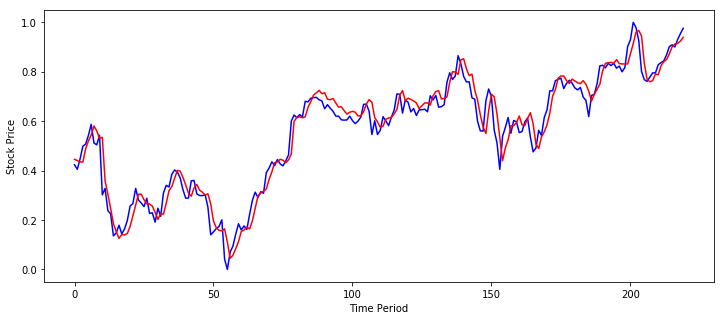

In [17]:
  # Plot predictions
    plt.figure(figsize=(12,5))
    plt.plot(testY, 'b')
    plt.plot(test_predict, 'r')
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()